In [112]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 

In [79]:
loan = pd.read_csv("loan.csv", sep=",",encoding = "ISO-8859-1",low_memory = False)
#Information about dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [80]:

#get number of rows and columns in the dataset

print("Shape of the dataset : ", loan.shape,"\n")
print("Columns of the dataset : ")
loan.columns

Shape of the dataset :  (39717, 111) 

Columns of the dataset : 


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [81]:
#get columns with null values
null_columns = loan.columns[loan.isnull().any()]

print("Columns containing NA values : \n" , null_columns,"\n\n")

#get percentage of null values
null_count = (loan[null_columns].isnull().sum()/len(loan.index))*100

print("Percentage of null values in each columns : \n",null_count)

Columns containing NA values : 
 Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_12

In [82]:
#Drop columns with 100% NA values
loan_df = loan.dropna(how='all',axis=1)

In [83]:
print("Column details after removing null values")
print("=============================================")
print("Shape of the dataset : ",loan_df.shape)
#get columns with null values
null_columns = loan_df.columns[loan_df.isnull().any()]
print("Columns containing NA values : \n" , null_columns,"\n\n")

#get percentage of null values
null_count = (loan_df[null_columns].isnull().sum()/len(loan_df.index))*100
print("Percentage of null values in each columns : \n",null_count)

Column details after removing null values
Shape of the dataset :  (39717, 57)
Columns containing NA values : 
 Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object') 


Percentage of null values in each columns : 
 emp_title                      6.191303
emp_length                     2.706650
desc                          32.580507
title                          0.027696
mths_since_last_delinq        64.662487
mths_since_last_record        92.985372
revol_util                     0.125891
last_pymnt_d                   0.178765
next_pymnt_d                  97.129693
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens 

In [84]:
#seeing the dataset after dropping the columns with 100% NA values
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [85]:
#checking categorical variables and see for useful info
unique_columns = loan_df.columns[loan_df.nunique(dropna=False) < 10]

for i in range(0,len(unique_columns)):
  print("Column: ",unique_columns[i],"having unique values: ",loan_df[unique_columns[i]].unique())

Column:  term having unique values:  [' 36 months' ' 60 months']
Column:  grade having unique values:  ['B' 'C' 'A' 'E' 'F' 'D' 'G']
Column:  home_ownership having unique values:  ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
Column:  verification_status having unique values:  ['Verified' 'Source Verified' 'Not Verified']
Column:  loan_status having unique values:  ['Fully Paid' 'Charged Off' 'Current']
Column:  pymnt_plan having unique values:  ['n']
Column:  inq_last_6mths having unique values:  [1 5 2 0 3 4 6 7 8]
Column:  pub_rec having unique values:  [0 1 2 3 4]
Column:  initial_list_status having unique values:  ['f']
Column:  next_pymnt_d having unique values:  [nan 'Jun-16' 'Jul-16']
Column:  collections_12_mths_ex_med having unique values:  [ 0. nan]
Column:  policy_code having unique values:  [1]
Column:  application_type having unique values:  ['INDIVIDUAL']
Column:  acc_now_delinq having unique values:  [0]
Column:  chargeoff_within_12_mths having unique values:  [ 0. nan]
Colu

In [86]:

#Drop columns having only one value
drop_cols = [c for c
             in list(loan_df)
             if loan_df[c].nunique() <= 1]
print(drop_cols)
loan_df.drop(columns=drop_cols,inplace=True)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


C:\Users\rajee\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [87]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [88]:
loan_df.shape

(39717, 48)

In [89]:
loan_df['emp_title'].isnull().sum()/len(loan_df.index)

0.06191303472064859

In [90]:
loan_df['emp_title'].str.lower().nunique()

27443

Removing emp_title and next_payment_d, url, desc

In [91]:
loan_df['recoveries'].isnull().sum()/len(loan_df.index)*100

0.0

In [92]:
    loan_df.isnull().sum()/len(loan_df.index)*100

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.580507
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
m

In [93]:
loan_df.drop(columns=['next_pymnt_d','mths_since_last_delinq','mths_since_last_record','desc','emp_title','url'], inplace=True)

In [253]:
loan_df.title.head(20)

0                                  Computer
1                                      bike
2                      real estate business
3                                  personel
4                                  Personal
5     My wedding loan I promise to pay back
6                                      Loan
7                           Car Downpayment
8      Expand Business & Buy Debt Portfolio
9               Building my credit history.
10               High intrest Consolidation
11                            Consolidation
12                                  freedom
13                            citicard fund
14                               Other Loan
15                  Debt Consolidation Loan
16                                     Home
17                                  Holiday
18                                  Medical
19      lowerratemeanseasiertogetoutofdebt!
Name: title, dtype: object

In [94]:
 loan_df.isnull().sum()/len(loan_df.index)*100

id                         0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.027696
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0

In [95]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [96]:
# Coverting Dates to date time format 
loan_df.last_pymnt_d=pd.to_datetime(loan_df.last_pymnt_d, format='%b-%y', errors='ignore')
loan_df.last_credit_pull_d=pd.to_datetime(loan_df.last_credit_pull_d, format='%b-%y', errors='ignore')

C:\Users\rajee\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [97]:
loan_df.info()
loan_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   member_id                39717 non-null  int64         
 2   loan_amnt                39717 non-null  int64         
 3   funded_amnt              39717 non-null  int64         
 4   funded_amnt_inv          39717 non-null  float64       
 5   term                     39717 non-null  object        
 6   int_rate                 39717 non-null  object        
 7   installment              39717 non-null  float64       
 8   grade                    39717 non-null  object        
 9   sub_grade                39717 non-null  object        
 10  emp_length               38642 non-null  object        
 11  home_ownership           39717 non-null  object        
 12  annual_inc               39717 n

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0


In [257]:
loan_df.pivot_table(values='loan_amnt',index='loan_status',aggfunc='count')
#loan_df.pivot_table(values='out_prncp',index='open_acc',aggfunc='mean').plot(kind='hist')

#plt.show()

,loan_amnt
loan_status,
Charged Off,5627
Current,1140
Fully Paid,32950


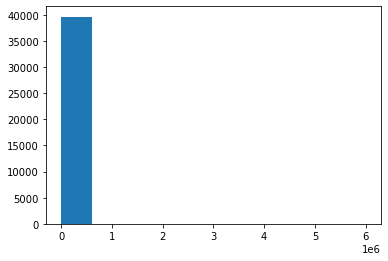

In [117]:
plt.hist(loan_df.annual_inc)
plt.show()

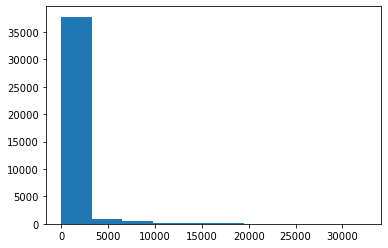

In [259]:

plt.hist(loan_df.funded_amnt - loan_df.funded_amnt_inv)
plt.show()

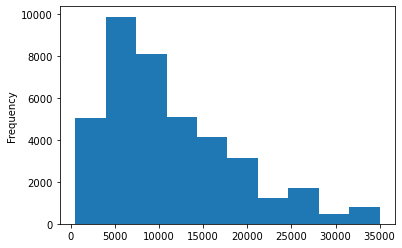

In [196]:
loan_df.loan_amnt.plot(kind='hist')
plt.show()

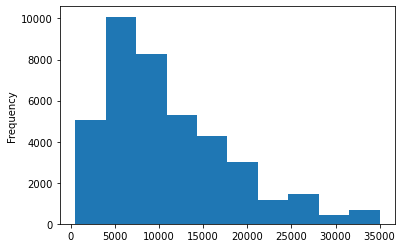

In [197]:
loan_df.funded_amnt.plot(kind='hist')
plt.show()

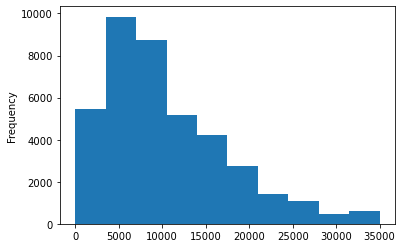

In [200]:
loan_df.funded_amnt_inv.plot(kind='hist')
plt.show()

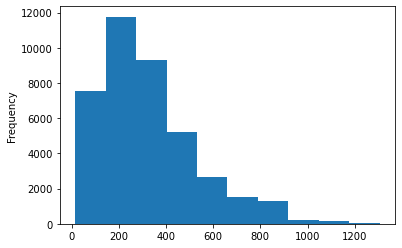

In [202]:
loan_df.installment.plot(kind='hist')
plt.show()

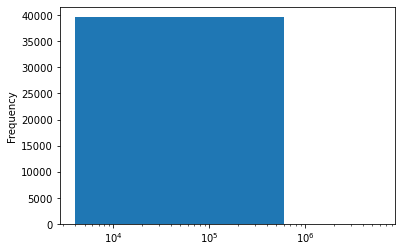

In [252]:
loan_df.annual_inc.sort_values().plot(kind='hist' ,logx=True)
plt.show()

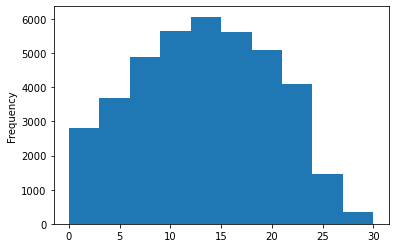

In [254]:
loan_df.dti.plot(kind='hist' )
plt.show()

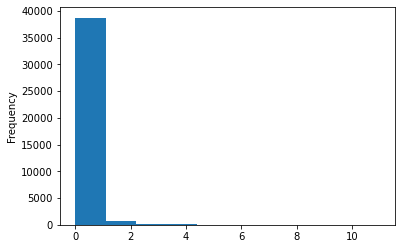

In [255]:
loan_df.delinq_2yrs.plot(kind='hist' )
plt.show()

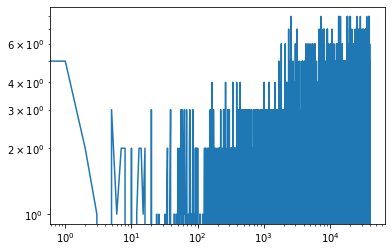

In [130]:
loan_df.inq_last_6mths.plot(loglog=True)
plt.show()

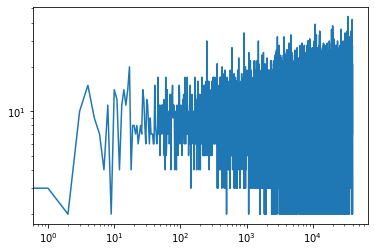

In [131]:
loan_df.open_acc.plot(loglog=True)
plt.show()

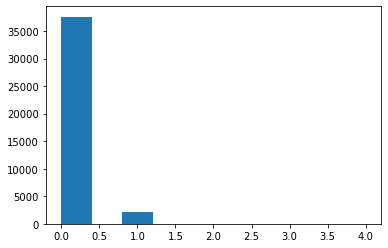

In [134]:
#loan_df.pub_rec.plot(loglog=True)

plt.hist(loan_df.pub_rec)
plt.show()

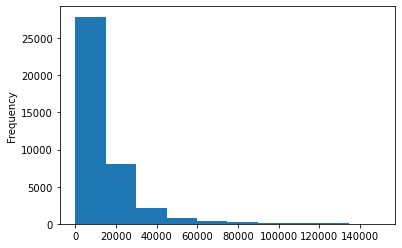

In [206]:
loan_df.revol_bal.sort_values().plot(kind='hist')
plt.show()

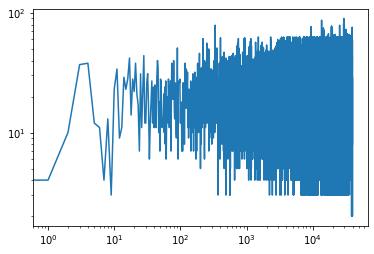

In [136]:
loan_df.total_acc.plot(loglog=True)
plt.show()

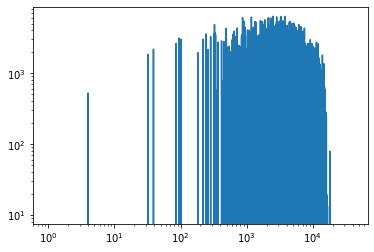

In [137]:
loan_df.out_prncp.plot(loglog=True)
plt.show()

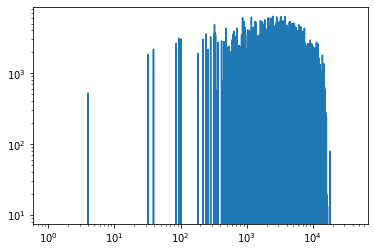

In [138]:
loan_df.out_prncp_inv.plot(loglog=True)
plt.show()

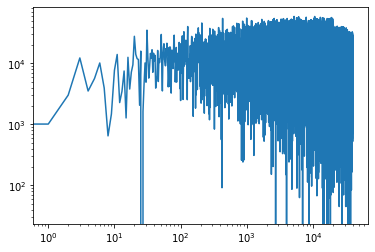

In [139]:
loan_df.total_pymnt.plot(loglog=True)
plt.show()

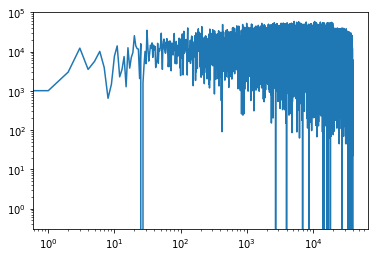

In [140]:
loan_df.total_pymnt_inv.plot(loglog=True)
plt.show()

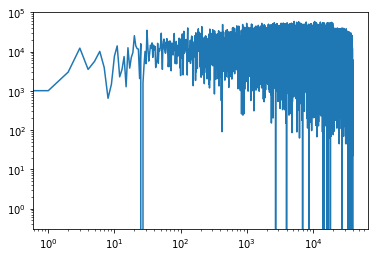

In [141]:
loan_df.total_pymnt_inv.plot(loglog=True)
plt.show()

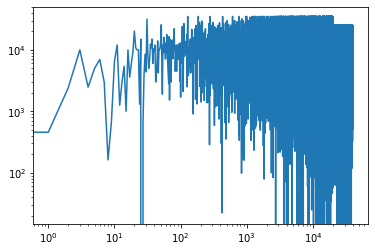

In [142]:
loan_df.total_rec_prncp.plot(loglog=True)
plt.show()

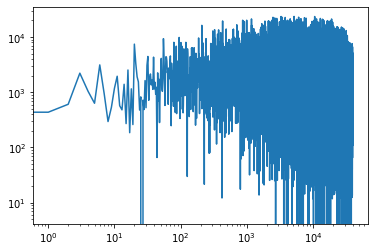

In [143]:
loan_df.total_rec_int.plot(loglog=True)
plt.show()

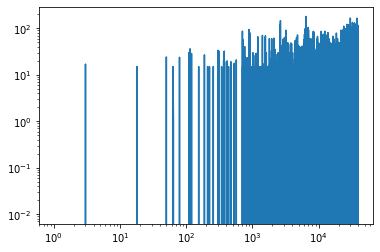

In [144]:
loan_df.total_rec_late_fee.plot(loglog=True)
plt.show()

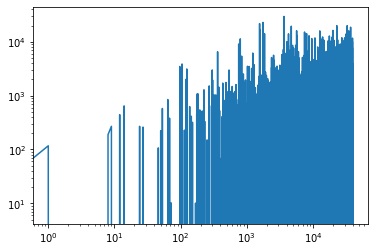

In [145]:
loan_df.recoveries.plot(loglog=True)
plt.show()

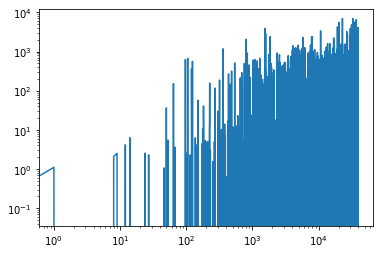

In [146]:
loan_df.collection_recovery_fee.plot(loglog=True)
plt.show()

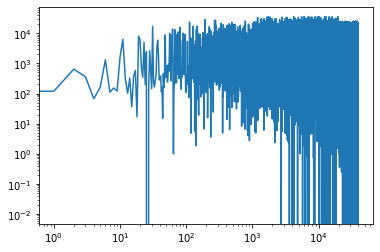

In [147]:
loan_df.last_pymnt_amnt.plot(loglog=True)
plt.show()

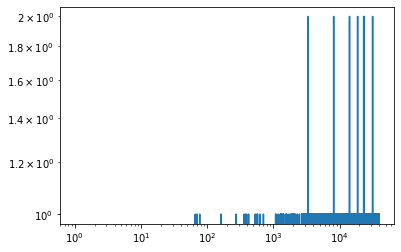

In [148]:
loan_df.pub_rec_bankruptcies.plot(loglog=True)
plt.show()

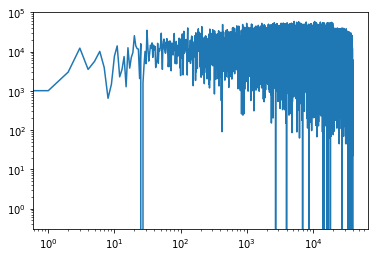

In [149]:
loan_df.total_pymnt_inv.plot(loglog=True)
plt.show()

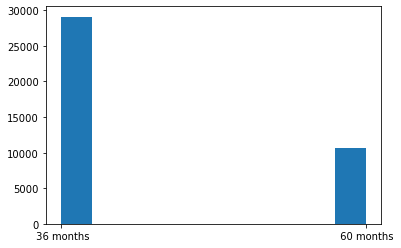

In [151]:
plt.hist(loan_df.term)
plt.show()

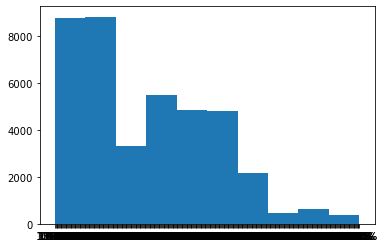

In [152]:
plt.hist(loan_df.int_rate)
plt.show()

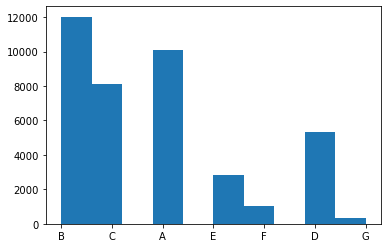

In [153]:
plt.hist(loan_df.grade)
plt.show()

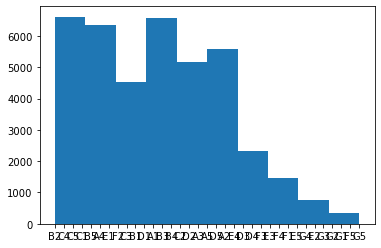

In [154]:
plt.hist(loan_df.sub_grade)
plt.show()

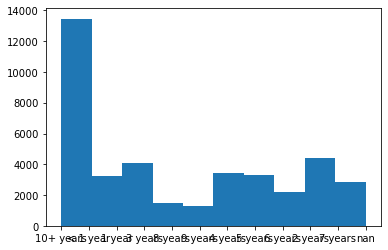

In [159]:
plt.hist(loan_df.emp_length.apply(lambda x: str(x)))

plt.show()

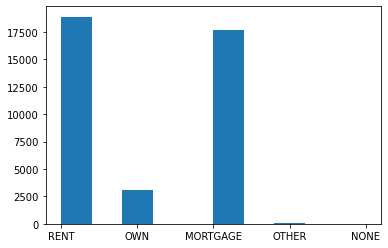

In [160]:
plt.hist(loan_df.home_ownership)
plt.show()

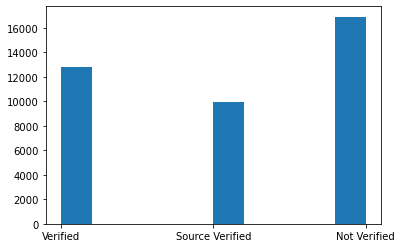

In [161]:
plt.hist(loan_df.verification_status)
plt.show()

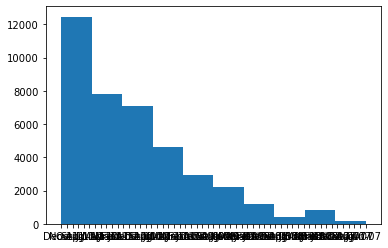

In [162]:
plt.hist(loan_df.issue_d)
plt.show()

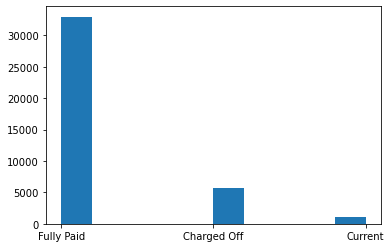

In [175]:
plt.hist(loan_df.loan_status)
plt.show()

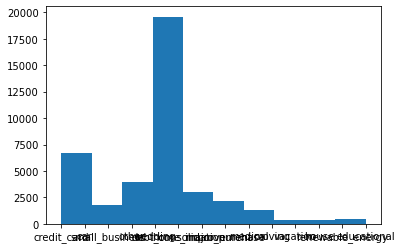

In [164]:
plt.hist(loan_df.purpose)
plt.show()

In [ ]:
plt.hist(loan_df.zip_code)
plt.show()

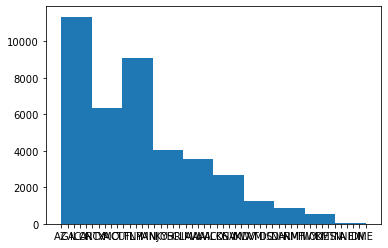

In [179]:
plt.hist(loan_df.addr_state)
plt.show()

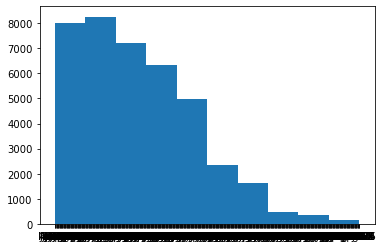

In [178]:
plt.hist(loan_df.earliest_cr_line)
plt.show()

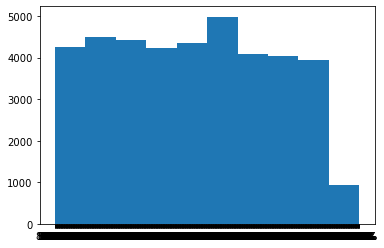

In [182]:
plt.hist(loan_df.revol_util.apply(lambda x: str(x)) )
plt.show()